In [1]:
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 


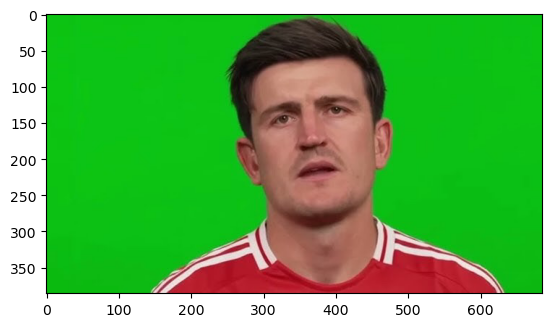

In [2]:
my_image_path = "C:/Users/양자/Desktop/Hun_Works/AIFFEL_quest_rs/Exploration/ex03/images/test2.png" # 본인 이미지가 있는 경로를 가지고 온다.

# 한글 경로 지원을 위해 os 모듈 사용
abs_path = os.path.abspath(my_image_path)
img_bgr = cv2.imdecode(np.fromfile(abs_path, dtype=np.uint8), cv2.IMREAD_COLOR)

img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb,1)

In [4]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t),(r,b), (0,255,0), 2 ,lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

In [5]:
model_path = os.path.abspath("C:/temp files/shape_predictor_68_face_landmarks.dat")
landmark_predictor = dlib.shape_predictor(model_path)

In [6]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장
    print(dlib_rect)

[(287, 98) (442, 253)]


In [7]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33]) # 인중 인덱스 33 이라고 함
    x = landmark[33][0] # 이미지에서 인중 부위의 x값
    y = landmark[33][1] # 이미지에서 인중 부위의 y값
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(370, 189)
(x,y) : (370,189)
(w,h) : (156,156)


In [8]:
cat_path = os.path.abspath("C:/Users/양자/Desktop/Hun_Works/AIFFEL_quest_rs/Exploration/ex03/images/cat-whiskers.png") # 왕관 이미지의 경로
#img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.imdecode(np.fromfile(cat_path, dtype=np.uint8), cv2.IMREAD_COLOR)
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인

(156, 156, 3)


In [9]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임

refined_x = x - w // 2
refined_y = y - h // 2 ## 이 위치로 바꾸자
print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남

(x,y) : (292,111)


In [10]:
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (292,111)


In [11]:
# 스티커 영역 추출
sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]]

# 스티커 이미지의 마스크 생성 (흑색 영역 제외)
mask = (img_sticker < 255)  # True: 흑색이 아닌 부분, False: 흑색 부분

# 마스크 차원 확장 (RGB 채널 처리)
if len(mask.shape) == 2:  # 흑백 이미지인 경우
    mask = np.stack([mask] * 3, axis=-1)  # 채널별로 복제하여 3D 마스크 생성

# 흑색 영역 제외하고 스티커 적용
sticker_area = np.where(mask,  # 마스크 적용
                        cv2.addWeighted(
                            sticker_area.astype(np.float32), 0,  # 원본 이미지 가중치
                            img_sticker.astype(np.float32), 1,  # 스티커 이미지 가중치
                            0
                        ).astype(np.uint8),
                        sticker_area)  # 마스크 False인 경우 원본 유지

# 결과 반영
img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = sticker_area

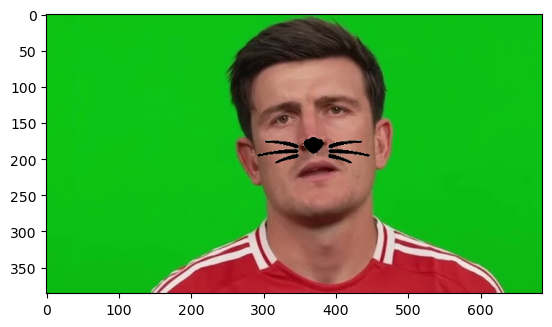

In [12]:
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = sticker_area

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()